In [90]:
import matplotlib.pyplot as plt 
import torch 
import numpy as np
import torch.nn as nn 
import torch.optim as optim 
import torch.distributions as distributions 
import torch.nn.functional as F

In [91]:
# Define the plot function
def plot(xs, ys, xlim=(-3,3), ylim=(-5,5)):
    fig, ax = plt.subplots()
    ax.plot(xs, ys,  linewidth=5)
    ax.grid(True, which='both')

    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

# 一个简单的全连接神经网络，模拟 sin 和 cos 函数

In [92]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.net = nn.Sequential()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [93]:
net = Net(input_size=1, output_size=1)

In [94]:
print(net)

Net(
  (net): Sequential()
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


torch.Size([100, 1])


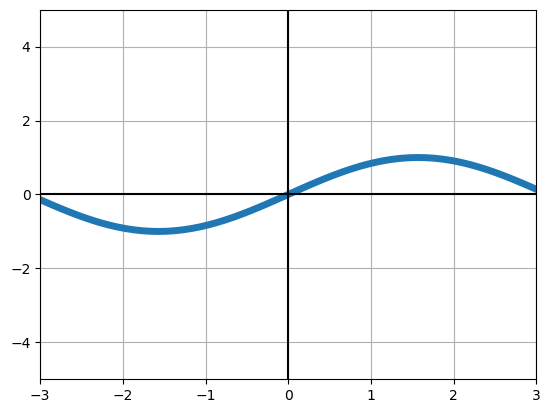

In [95]:
x = torch.linspace(-5, 5, 100).view(100, 1) 
print(x.shape) 
y_target = torch.sin(x) 
# y_target = x**2
loss_fn = nn.MSELoss() 
plot(x, y_target)

In [96]:
y = net(x)
print(y.shape)

torch.Size([100, 1])


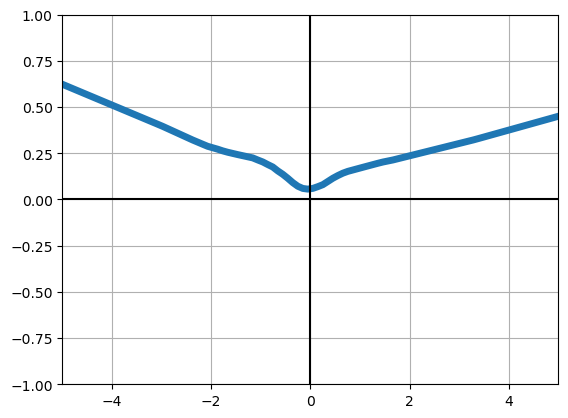

In [97]:
plot(x.detach().numpy(), y.detach().numpy(), ylim=(-1, 1), xlim=(-5, 5))

In [98]:
# Training
loss = ((y - y_target)**2).sum()
loss.backward()

In [99]:
for p in net.parameters():
    p.data.add_(-0.001 * p.grad)
    p.grad.data.zero_()


In [100]:
for _ in range(1000):
    y = net(x)
    loss = ((y - y_target)**2).sum()
    loss.backward()
    for p in net.parameters():
        p.data.add_(-0.001 * p.grad)
        p.grad.data.zero_()

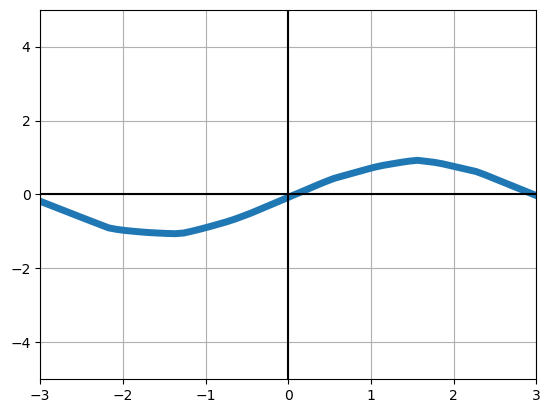

In [101]:
plot(x.detach().numpy(), y.detach().numpy())

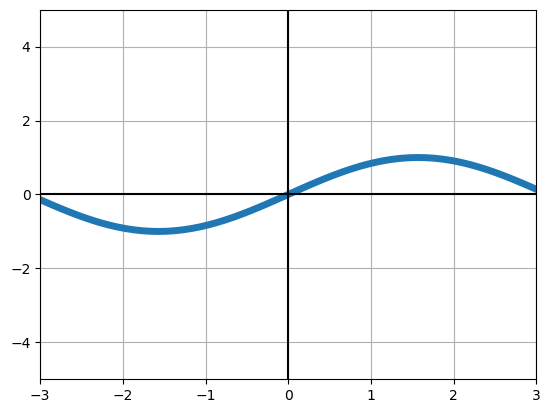

In [102]:
plot(x, y_target)

In [103]:
loss_fn = nn.MSELoss()

## 模拟 x^2 

Epoch 0, Loss: 127.3608
Epoch 100, Loss: 24.1818
Epoch 200, Loss: 12.0325
Epoch 300, Loss: 6.6607
Epoch 400, Loss: 3.2066
Epoch 500, Loss: 2.0366
Epoch 600, Loss: 1.6141
Epoch 700, Loss: 1.2871
Epoch 800, Loss: 1.0108
Epoch 900, Loss: 0.7761


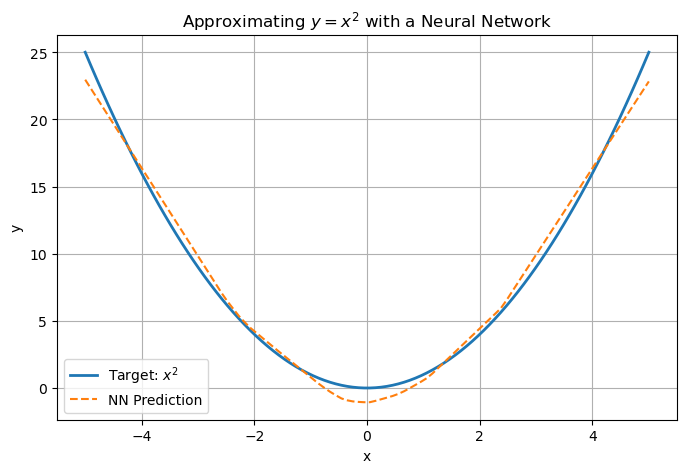

In [104]:
# Create input data
x = torch.linspace(-5, 5, 100).view(-1, 1)
y_target = x**2

# Define the neural network
class Net(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )

    def forward(self, x):
        return self.net(x)

# Instantiate model, loss function, and optimizer
net = Net()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# Training loop
for epoch in range(1000):
    y_pred = net(x)
    loss = loss_fn(y_pred, y_target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Plotting the result
plt.figure(figsize=(8, 5))
plt.plot(x.detach().numpy(), y_target.detach().numpy(), label='Target: $x^2$', linewidth=2)
plt.plot(x.detach().numpy(), y_pred.detach().numpy(), label='NN Prediction', linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Approximating $y = x^2$ with a Neural Network")
plt.grid(True)
plt.legend()
plt.show()